Downloading...
From: https://drive.google.com/uc?id=1bJVxqJN4jQLpc8dgR0W9PVRms1LV5O2d
To: C:\Users\19874\Bitcoin_Price.csv
100%|██████████████████████████████████████████████████████████████████████████████| 27.8k/27.8k [00:00<00:00, 703kB/s]
C:\Users\19874\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00108. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2872.63
Distribution:                  Normal   AIC:                          -5737.25
Method:            Maximum Likelihood   BIC:                          -5716.28
                                        No. Observations:                 1398
Date:                Wed, Sep 18 2024   Df Residuals:                     1397
Time:                        00:32:58   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.2749e-03  7.594e-04      1.679  9.317e-02 

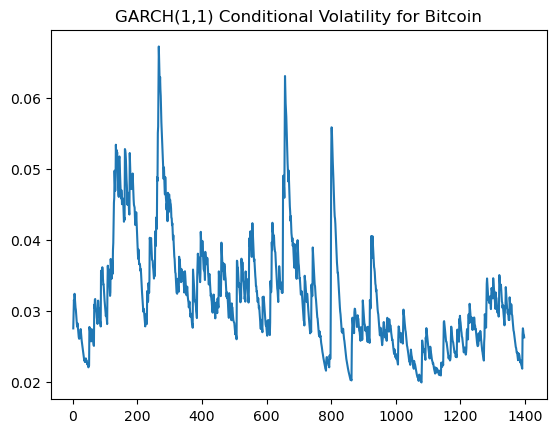

In [1]:
# Install gdown to download files from Google Drive
!pip install gdown

# Import the necessary libraries
import gdown
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
import numpy as np

# Download the file from Google Drive using gdown
url = 'https://drive.google.com/uc?id=1bJVxqJN4jQLpc8dgR0W9PVRms1LV5O2d'  # Modify the URL to the correct format for gdown
output = 'Bitcoin_Price.csv'
gdown.download(url, output, quiet=False)

# Load the Bitcoin price data, skip the first 5 rows (metadata) and remove the header row
bitcoin_cleaned = pd.read_csv(output, skiprows=6)

# Rename the columns for clarity
bitcoin_cleaned.columns = ['Date', 'Close']

# Convert the 'Date' column to datetime format, ensuring we skip errors
bitcoin_cleaned['Date'] = pd.to_datetime(bitcoin_cleaned['Date'], errors='coerce')

# Remove any rows with invalid dates (NaT) or missing values
bitcoin_cleaned = bitcoin_cleaned.dropna().sort_values('Date')
bitcoin_cleaned.reset_index(drop=True, inplace=True)

# Calculate log returns
bitcoin_cleaned['Log_Returns'] = bitcoin_cleaned['Close'].pct_change().apply(lambda x: np.log(1 + x)).dropna()

# Fit the GARCH(1,1) model
garch_model = arch_model(bitcoin_cleaned['Log_Returns'].dropna(), vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Display the model summary
print(garch_fit.summary())

# Plot the conditional volatility
volatility = garch_fit.conditional_volatility
plt.plot(volatility)
plt.title('GARCH(1,1) Conditional Volatility for Bitcoin')
plt.show()

Downloading...
From: https://drive.google.com/uc?id=1bJVxqJN4jQLpc8dgR0W9PVRms1LV5O2d
To: C:\Users\19874\Bitcoin_Price.csv
100%|██████████████████████████████████████████████████████████████████████████████| 27.8k/27.8k [00:00<00:00, 856kB/s]
C:\Users\19874\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00108. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - EGARCH Model Results                     
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                2880.04
Distribution:                  Normal   AIC:                          -5752.09
Method:            Maximum Likelihood   BIC:                          -5731.12
                                        No. Observations:                 1398
Date:                Wed, Sep 18 2024   Df Residuals:                     1397
Time:                        00:33:10   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.7912e-04  4.690e-04      2.088  3.684e-02 [5.

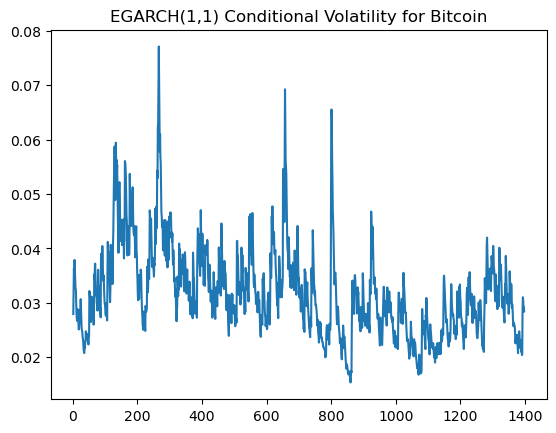

In [2]:
# Install gdown to download files from Google Drive
!pip install gdown

# Import the necessary libraries
import gdown
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
import numpy as np

# Download the file from Google Drive using gdown
url = 'https://drive.google.com/uc?id=1bJVxqJN4jQLpc8dgR0W9PVRms1LV5O2d'  # Modify the URL to the correct format for gdown
output = 'Bitcoin_Price.csv'
gdown.download(url, output, quiet=False)

# Load the Bitcoin price data, skip the first 5 rows (metadata) and remove the header row
bitcoin_cleaned = pd.read_csv(output, skiprows=6)

# Rename the columns for clarity
bitcoin_cleaned.columns = ['Date', 'Close']

# Convert the 'Date' column to datetime format, ensuring we skip errors
bitcoin_cleaned['Date'] = pd.to_datetime(bitcoin_cleaned['Date'], errors='coerce')

# Remove any rows with invalid dates (NaT) or missing values
bitcoin_cleaned = bitcoin_cleaned.dropna().sort_values('Date')
bitcoin_cleaned.reset_index(drop=True, inplace=True)

# Calculate log returns
bitcoin_cleaned['Log_Returns'] = bitcoin_cleaned['Close'].pct_change().apply(lambda x: np.log(1 + x)).dropna()

# Fit the EGARCH(1,1) model (note 'EGarch' for the vol parameter)
egarch_model = arch_model(bitcoin_cleaned['Log_Returns'].dropna(), vol='EGarch', p=1, q=1)
egarch_fit = egarch_model.fit(disp='off')

# Display the model summary
print(egarch_fit.summary())

# Plot the conditional volatility
volatility = egarch_fit.conditional_volatility
plt.plot(volatility)
plt.title('EGARCH(1,1) Conditional Volatility for Bitcoin')
plt.show()